<a href="https://colab.research.google.com/github/bartekdzek/Weather-Forecasting-with-Machine-Learning/blob/main/weather_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Machine Learning Project

## Overview

This project involves analyzing and predicting weather data using machine learning techniques. The dataset contains daily weather observations in Fahrenheit. The goal is to build a predictive model to estimate the maximum temperature for the following day based on historical data.

## Data Description

The dataset, `local_weather.csv`, contains daily weather records collected from the New Orleans Airport station with the following columns:
- `PRCP`: Precipitation (in tenths of mm)
- `SNOW`: Snowfall (in tenths of mm)
- `SNWD`: Snow depth (in mm)
- `TMAX`: Maximum temperature (in tenths of degrees Fahrenheit)
- `TMIN`: Minimum temperature (in tenths of degrees Fahrenheit)

### Station Details
- **Name**: New Orleans Airport, LA US
- **Network ID**: GHCND:USW00012916
- **Latitude/Longitude**: 29.99755°, -90.27772°
- **Elevation**: -1 m

## Steps in the Project

1. **Data Loading and Preparation**
   - Load the dataset using pandas.
   - Inspect and clean the data by handling missing values.
   - Convert data types as needed and address any anomalies (e.g., unrealistic values).

2. **Exploratory Data Analysis (EDA)**
   - Plot temperature trends and precipitation data.
   - Aggregate and visualize annual and monthly precipitation totals.
   - Analyze the correlation between features and the target variable.

3. **Feature Engineering**
   - Generate rolling mean features for temperature.
   - Compute new features like the temperature range and logarithm of precipitation.
   - Evaluate the impact of these features on model performance.

4. **Model Training and Evaluation**
   - Train a Ridge regression model to predict the maximum temperature for the following day.
   - Evaluate model performance using Mean Absolute Error (MAE).
   - Compare the Ridge regression model with more advanced models like Random Forests.

5. **Prediction and Results**
   - Use the best-performing model to predict the maximum temperature for the next day.
   - Analyze model predictions and errors to improve forecasting accuracy.

## Key Features Added

- **Rolling Means**: To capture trends in temperature over a 30-day window.
- **Temperature Range**: Difference between maximum and minimum temperatures.
- **Log Transformation**: Applied to precipitation to handle skewed distributions.

## How to Use

1. **Setup**: Ensure you have the required libraries installed:
   - `pandas`
   - `numpy`
   - `sklearn`

2. **Run the Notebook**: Execute the notebook cells sequentially to:
   - Load and clean the data.
   - Train and evaluate models.
   - Make future temperature predictions.

3. **Prediction for Tomorrow**: The function `predict_tomorrow` can be used to forecast the maximum temperature for the next day based on the latest available data.

## Results

The project demonstrates various methods for predicting weather data, including:
- Feature selection and engineering to improve model performance.
- Comparing different machine learning models to identify the best approach.


## Acknowledgments

This project is based on data collected from the New Orleans Airport weather station. Special thanks to the Global Historical Climatology Network (GHCN) for providing the weather data.


# Reading the data into pandas

In [394]:
import pandas as pd

In [395]:
weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [396]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,FRGT,PGTM,PRCP,PSUN,...,WT08,WT10,WT11,WT13,WT14,WT16,WT17,WT18,WT21,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00012916,"NEW ORLEANS AIRPORT, LA US",NaN,NaN,NaN,NaN,NaN,24.0,0.00,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1960-01-02,USW00012916,"NEW ORLEANS AIRPORT, LA US",NaN,NaN,NaN,NaN,NaN,2136.0,0.09,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1960-01-03,USW00012916,"NEW ORLEANS AIRPORT, LA US",NaN,NaN,NaN,NaN,NaN,42.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1960-01-04,USW00012916,"NEW ORLEANS AIRPORT, LA US",NaN,NaN,NaN,NaN,NaN,748.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00012916,"NEW ORLEANS AIRPORT, LA US",NaN,NaN,NaN,NaN,NaN,2300.0,0.05,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29,USW00012916,"NEW ORLEANS AIRPORT, LA US",NaN,NaN,4.47,NaN,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-30,USW00012916,"NEW ORLEANS AIRPORT, LA US",NaN,NaN,5.37,NaN,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-31,USW00012916,"NEW ORLEANS AIRPORT, LA US",NaN,NaN,4.92,NaN,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Preparing the data for machine learning

In [397]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.514942
ACSH       0.514942
AWND       0.371964
FMTM       0.570302
FRGT       0.999915
PGTM       0.232250
PRCP       0.000170
PSUN       0.838710
SNOW       0.280149
SNWD       0.320843
TAVG       0.711415
TMAX       0.000042
TMIN       0.000042
TSUN       0.628842
WDF1       0.515239
WDF2       0.562672
WDF5       0.564792
WDFG       0.439066
WSF1       0.515239
WSF2       0.562672
WSF5       0.564792
WSFG       0.438939
WT01       0.566106
WT02       0.944555
WT03       0.799712
WT04       0.998177
WT05       0.998135
WT06       0.999576
WT07       0.999915
WT08       0.617015
WT10       0.997541
WT11       0.998940
WT13       0.872748
WT14       0.975287
WT16       0.660082
WT17       0.999915
WT18       0.998813
WT21       0.978042
WV03       0.999788
dtype: float64

In [398]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

In [399]:
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [400]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.00,0.0,0.0,55.0,45.0
1960-01-02,0.09,0.0,0.0,68.0,52.0
1960-01-03,0.00,0.0,0.0,59.0,45.0
1960-01-04,0.00,0.0,0.0,50.0,42.0
1960-01-05,0.05,0.0,0.0,62.0,46.0
...,...,...,...,...,...
2024-07-29,0.00,0.0,NaN,93.0,78.0
2024-07-30,0.00,0.0,NaN,96.0,78.0
2024-07-31,0.00,0.0,NaN,95.0,80.0


#Filling in missing values

In [401]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.000170
snow          0.280149
snow_depth    0.320843
temp_max      0.000042
temp_min      0.000042
dtype: float64

In [402]:
core_weather["snow"].value_counts()

snow
0.0    16977
2.7        1
0.1        1
0.6        1
0.4        1
0.5        1
Name: count, dtype: int64

In [403]:
del core_weather["snow"]

In [404]:
core_weather["snow_depth"].value_counts()

snow_depth
0.0    16019
1.0        2
2.0        1
Name: count, dtype: int64

In [405]:
del core_weather["snow_depth"]

In [406]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1998-05-02,NaN,83.0,66.0
2021-08-23,NaN,97.0,79.0
2021-08-25,NaN,96.0,80.0
2024-08-02,NaN,NaN,NaN


In [407]:
core_weather["precip"].value_counts()

precip
0.00    16194
0.01      604
0.02      389
0.05      266
0.03      265
        ...  
4.07        1
4.01        1
4.24        1
3.58        1
3.05        1
Name: count, Length: 386, dtype: int64

In [408]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [409]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_max,temp_min
DATE,,,
2024-08-02,0.0,NaN,NaN


In [410]:
core_weather = core_weather.ffill()

In [411]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

# Verifying we have the correct data types

In [412]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [413]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-27', '2024-07-28',
       '2024-07-29', '2024-07-30', '2024-07-31', '2024-08-01', '2024-08-02'],
      dtype='object', name='DATE', length=23591)

In [414]:
core_weather.index = pd.to_datetime(core_weather.index)

In [415]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-27',
               '2024-07-28', '2024-07-29', '2024-07-30', '2024-07-31',
               '2024-08-01', '2024-08-02'],
              dtype='datetime64[ns]', name='DATE', length=23591, freq=None)

In [416]:
core_weather.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

#Analyzing our weather data

<Axes: xlabel='DATE'>

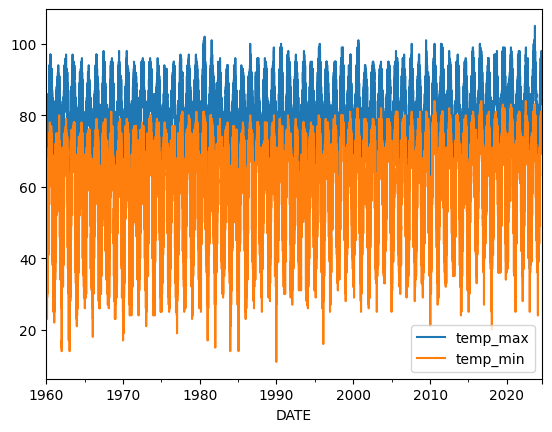

In [417]:
core_weather[["temp_max", "temp_min"]].plot()

In [418]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
core_weather.index.year.value_counts().sort_index()

DATE
1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    215
Name: count, dtype: int64

<Axes: xlabel='DATE'>

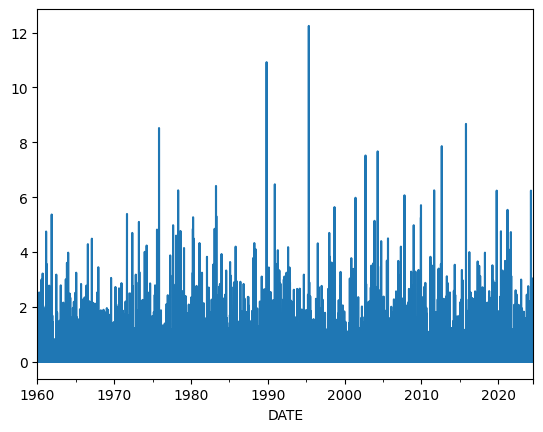

In [419]:
core_weather['precip'].plot()

In [420]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1960     47.01
1961     83.54
1962     39.00
1963     50.25
1964     58.09
1965     49.34
1966     68.08
1967     53.43
1968     43.15
1969     52.04
1970     50.34
1971     57.43
1972     63.98
1973     79.28
1974     72.79
1975     80.50
1976     47.38
1977     72.80
1978     76.90
1979     60.24
1980     73.09
1981     54.51
1982     65.62
1983     85.30
1984     52.07
1985     66.98
1986     47.86
1987     60.63
1988     74.40
1989     67.47
1990     61.05
1991    102.37
1992     81.87
1993     52.71
1994     51.91
1995     65.33
1996     57.31
1997     51.68
1998     79.04
1999     46.31
2000     38.88
2001     69.51
2002     62.51
2003     66.28
2004     79.28
2005     53.00
2006     45.88
2007     53.30
2008     54.04
2009     79.31
2010     53.92
2011     54.63
2012     68.26
2013     66.37
2014     54.74
2015     71.34
2016     70.74
2017     72.42
2018     61.59
2019     62.53
2020     71.75
2021     86.08
2022     57.57
2023     39.85
2024     52.32
Name: precip, dtype:

# Training the machine learning model

In [421]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [422]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [423]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,55.0,45.0,68.0
1960-01-02,0.09,68.0,52.0,59.0
1960-01-03,0.00,59.0,45.0,50.0
1960-01-04,0.00,50.0,42.0,62.0
1960-01-05,0.05,62.0,46.0,52.0
...,...,...,...,...
2024-07-29,0.00,93.0,78.0,96.0
2024-07-30,0.00,96.0,78.0,95.0
2024-07-31,0.00,95.0,80.0,96.0


In [424]:
core_weather = core_weather.iloc[:-1,:].copy()

In [425]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,55.0,45.0,68.0
1960-01-02,0.09,68.0,52.0,59.0
1960-01-03,0.00,59.0,45.0,50.0
1960-01-04,0.00,50.0,42.0,62.0
1960-01-05,0.05,62.0,46.0,52.0
...,...,...,...,...
2024-07-28,0.36,93.0,78.0,93.0
2024-07-29,0.00,93.0,78.0,96.0
2024-07-30,0.00,96.0,78.0,95.0


In [426]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [427]:
predictors = ["precip", "temp_max", "temp_min"]

In [428]:
train = core_weather.loc[:"2022-12-31"]

In [429]:
test = core_weather.loc["2023-01-01":]

In [430]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [431]:
predictions = reg.predict(test[predictors])

In [432]:
from sklearn.metrics import mean_absolute_error

In [433]:
mean_absolute_error(test["target"], predictions)

3.854872546176807

# Evaluating the model

In [434]:
combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [435]:
combined

,actual,predictions
DATE,,
2023-01-01,79.0,73.536268
2023-01-02,77.0,80.248479
2023-01-03,77.0,78.602269
2023-01-04,70.0,76.441568
2023-01-05,69.0,70.871291
...,...,...
2024-07-28,93.0,91.540517
2024-07-29,96.0,92.070700
2024-07-30,95.0,94.274924


<Axes: xlabel='DATE'>

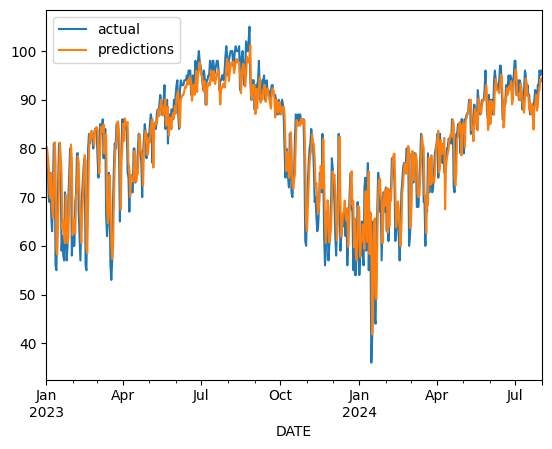

In [436]:
combined.plot()

In [437]:
reg.coef_

array([-1.47273148,  0.73474134,  0.15358421])

# Creating a function to make predictions

In [438]:
def create_predictions(predictors, core_weather, reg):
  train = core_weather.loc[:"2022-12-31"]
  test = core_weather.loc["2023-01-01":]
  reg.fit(train[predictors], train["target"])
  predictions = reg.predict(test[predictors])
  error = mean_absolute_error(test["target"], predictions)
  combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis=1)
  combined.columns = ["actual", "predictions"]
  return error, combined


# Adding in rolling means

In [439]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [440]:
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.00,55.0,45.0,68.0,NaN
1960-01-02,0.09,68.0,52.0,59.0,NaN
1960-01-03,0.00,59.0,45.0,50.0,NaN
1960-01-04,0.00,50.0,42.0,62.0,NaN
1960-01-05,0.05,62.0,46.0,52.0,NaN
...,...,...,...,...,...
2024-07-28,0.36,93.0,78.0,93.0,91.666667
2024-07-29,0.00,93.0,78.0,96.0,91.633333
2024-07-30,0.00,96.0,78.0,95.0,91.666667


In [441]:
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

In [442]:
core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [443]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min"]

In [444]:
core_weather = core_weather.iloc[30:,:].copy()

In [445]:
error, combined = create_predictions(predictors, core_weather, reg)

In [446]:
error

3.7461487306376897

<Axes: xlabel='DATE'>

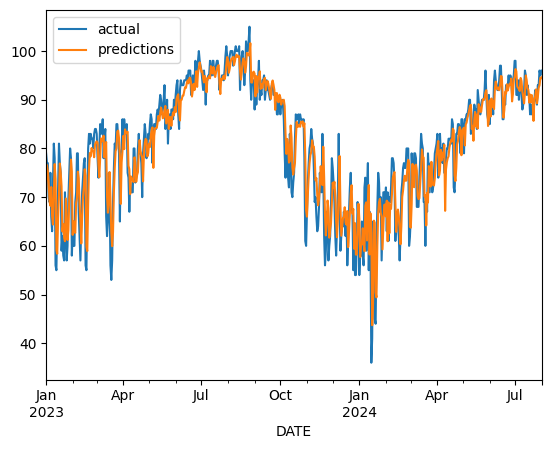

In [447]:
combined.plot()

# Adding in monthly and daily averages

In [448]:
core_weather['monthly_avg'] = core_weather["temp_max"].groupby(core_weather.index.month).transform('mean')

In [449]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-31,0.00,46.0,42.0,50.0,60.833333,1.322464,1.095238,61.940554
1960-02-01,0.00,50.0,45.0,56.0,60.233333,1.204667,1.111111,65.481764
1960-02-02,0.00,56.0,46.0,74.0,60.133333,1.073810,1.217391,65.481764
1960-02-03,1.57,74.0,50.0,71.0,60.933333,0.823423,1.480000,65.481764
1960-02-04,0.02,71.0,40.0,60.0,61.233333,0.862441,1.775000,65.481764
...,...,...,...,...,...,...,...,...
2024-07-28,0.36,93.0,78.0,93.0,91.666667,0.985663,1.192308,91.171712
2024-07-29,0.00,93.0,78.0,96.0,91.633333,0.985305,1.192308,91.171712
2024-07-30,0.00,96.0,78.0,95.0,91.666667,0.954861,1.230769,91.171712


In [450]:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).transform('mean')

In [451]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min", "day_of_year_avg", "monthly_avg"]

In [452]:
error, combined = create_predictions(predictors, core_weather, reg)

In [453]:
error

3.837876272305106

In [454]:
reg.coef_

array([-1.51865359,  0.25109732,  0.28695345,  0.16575783, -9.81212701,
        8.63902678,  0.26353722,  0.0779063 ])

In [455]:
core_weather.corr()["target"]

precip            -0.044140
temp_max           0.883800
temp_min           0.817526
target             1.000000
month_max          0.806587
month_day_max     -0.408001
max_min           -0.379499
monthly_avg        0.820764
day_of_year_avg    0.831161
Name: target, dtype: float64

we got worse results

In [456]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min"]
error, combined = create_predictions(predictors, core_weather, reg)
error

3.7461487306376897

# Analysis of the largest model errors


In [457]:
combined["diff"] = combined["actual"] - combined["predictions"].abs()

In [458]:
combined.sort_values("diff", ascending=False).head()

,actual,predictions,diff
DATE,,,
2024-01-17,65.0,48.060801,16.939199
2024-01-07,72.0,58.887466,13.112534
2023-12-08,83.0,70.504543,12.495457
2023-02-19,80.0,68.505202,11.494798
2023-01-16,81.0,70.418243,10.581757


# Feature Selection Optimization

In [459]:
import numpy as np
core_weather["temp_range"] = core_weather["temp_max"] - core_weather["temp_min"]
core_weather["log_precip"] = core_weather["precip"].apply(lambda x: np.log(x + 1))

predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min", "temp_range", "log_precip"]

error, combined = create_predictions(predictors, core_weather, reg)
print(f"MAE after adding new features: {error}")


MAE after adding new features: 3.675593133471148


better results

# Using more advanced models

In [460]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
error, combined = create_predictions(predictors, core_weather, rf)
print(f"MAE with RandomForest: {error}")

MAE with RandomForest: 3.8736075335142695


worse results

#Adding predictions for tomorrow

In [461]:
def predict_tomorrow(predictors, core_weather, reg):
    train = core_weather.loc[:"2022-12-31"]
    test = core_weather.loc["2023-01-01":]
    reg.fit(train[predictors], train["target"])


    last_day = core_weather.iloc[-1][predictors].to_frame().T
    prediction = reg.predict(last_day)

    last_date = core_weather.index[-1]
    prediction_date = last_date + pd.Timedelta(days=1)

    return prediction_date, prediction[0]

In [462]:
prediction_date, tomorrow_prediction = predict_tomorrow(predictors, core_weather, reg)
print(f"Predicted max temperature for {prediction_date.date()}: {tomorrow_prediction}")

Predicted max temperature for 2024-08-02: 94.99515045903209
